In [1]:
!pip install tweepy

In [8]:
import tweepy
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from google.colab import userdata
BEARER_TOKEN=userdata.get('BEARER_TOKEN')
API_KEY = userdata.get('API_KEY')
API_KEY_SECRET = userdata.get('API_KEY_SECRET')
ACCESS_TOKEN = userdata.get('ACCESS_TOKEN')
ACCESS_TOKEN_SECRET = userdata.get('ACCESS_TOKEN_SECRET')

In [5]:
client = tweepy.Client(bearer_token=BEARER_TOKEN)

In [6]:
news_channels = ["ndtv", "timesofindia", "indiatoday", "ZeeNews", "CNNnews18"]
news_data = {}
relationships = []

Error fetching user ndtv: 429 Too Many Requests
Too Many Requests
Error fetching user timesofindia: 429 Too Many Requests
Too Many Requests
Error fetching user indiatoday: 429 Too Many Requests
Too Many Requests
Error fetching user ZeeNews: 429 Too Many Requests
Too Many Requests
Error fetching user CNNnews18: 429 Too Many Requests
Too Many Requests


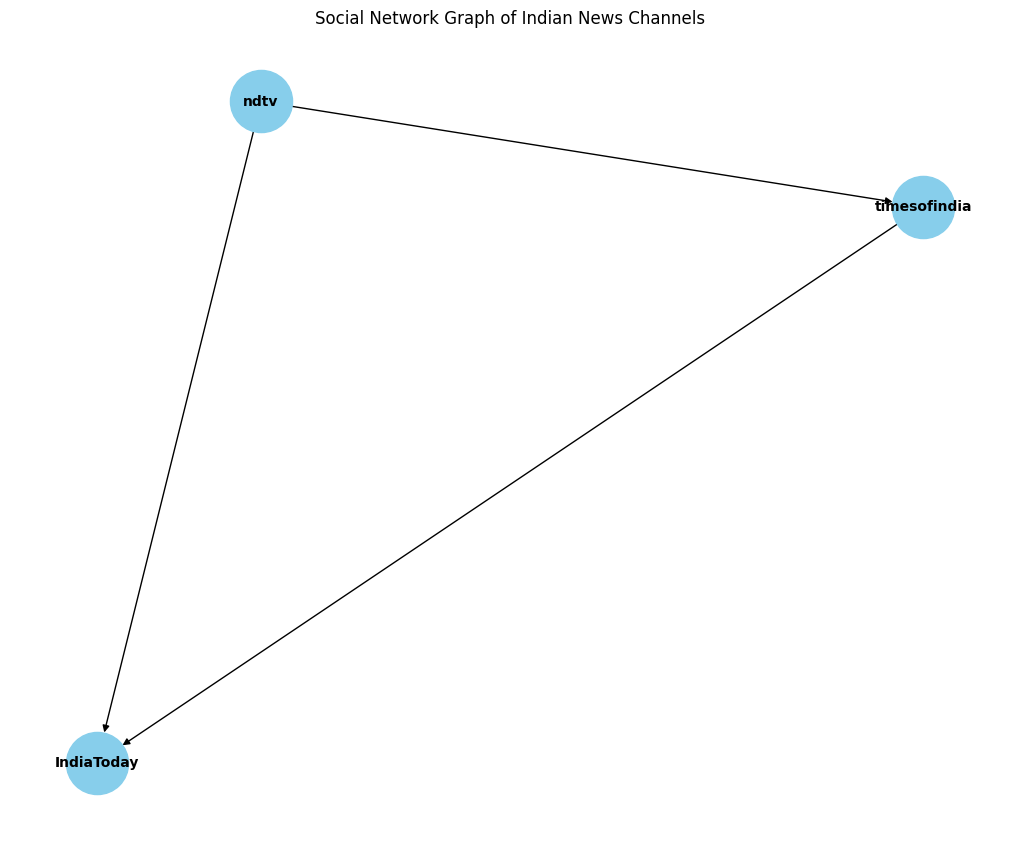

In [9]:
# Fetch account details
for channel in news_channels:
    try:
        user = client.get_user(username=channel, user_fields=["id", "username", "name", "public_metrics"])
        news_data[channel] = {
            "id": user.data.id,
            "username": user.data.username,
            "name": user.data.name,
            "followers_count": user.data.public_metrics["followers_count"]
        }
    except tweepy.TweepyException as e:
        print(f"Error fetching user {channel}: {e}")

# Example of direct relationships (follow relations between accounts in sample)
for channel1 in news_data.keys():
    for channel2 in news_data.keys():
        if channel1 != channel2:
            # Placeholder for a real relationship check (free tier limitation)
            if int(news_data[channel1]["followers_count"]) > int(news_data[channel2]["followers_count"]):  # Mock logic
                relationships.append((news_data[channel1]["username"], news_data[channel2]["username"]))

# Build the social network graph
G = nx.DiGraph()
for user in news_data.values():
    G.add_node(user["username"], label=user["name"])

for follower, followee in relationships:
    G.add_edge(follower, followee)

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Social Network Graph of Indian News Channels")
plt.show()